In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys

import findspark
findspark.init()
findspark.find()

from pyspark import SparkContext

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,163 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,391 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://cloud.r-project.org/bin/linux/ubuntu ja

In [2]:
sc = SparkContext("local", "RDDs") #iniciar contexto de spark

In [163]:
rdd = sc.textFile("/Movies.csv") #crear el RDD


In [153]:
rdd.take(2) #vistazo del RDD

['movie_id,title,vote_average,vote_count,status,release_date,revenue,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages',
 '4520010,Inception,8.364,34495,Released,7/15/2010,825532764,FALSE,160000000,tt1375666,en,Inception,"Cobb a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"" the implantation of another persons idea into a targets subconscious.",83.952,Action Science Fiction Adventure,Legendary Pictures Syncopy Warner Bros. Pictures,United Kingdom United States of America,English French Japanese Swahili']

In [154]:
rdd.count()

1048576

In [164]:
rdd_split = rdd.map(lambda line: line.split(","))


In [165]:
rdd_split.first()

['movie_id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'adult',
 'budget',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages']

In [166]:
# Eliminar la primera fila (encabezado)
header = rdd_split.first()  # Obtener el encabezado
rdd = rdd_split.filter(lambda row: row != header)  # Filtrar el encabezado

In [168]:
rdd.count()

1048575

In [169]:
rdd_filtered = rdd.filter(lambda row: "" not in row) #Limpieza de los datos
rdd_filtered.count()

224173

In [170]:
def try_convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return None  # Devolver None si no se puede convertir

In [173]:
rdd_cleaned = rdd.map(lambda row: [

    row[0],  # movie_id (lo dejamos como está, ya que es un identificador)
    row[1],  # title (también lo dejamos como está
    try_convert_to_float(row[2]),  # vote_average
    try_convert_to_float(row[3]),  # vote_count
    row[4],  # status (texto)
    row[5],  # release_date
    try_convert_to_float(row[6]),  # revenue
    row[7], #si es de adultos o no
    try_convert_to_float(row[8]),  # budget
    row[9],  # imdb_id
    row[10], # original_language
    row[11], # original_title
    row[12], # overview
    try_convert_to_float(row[13]),  # popularity
    row[14], # genres (texto)
    row[15], # production_companies
    row[16], # production_countries
    row[17]  # spoken_languages
])

In [175]:
rdd_cleaned.take(2) #vISTAZO A LOS DATOS YA CONVERTIDOS

[['4520010',
  'Inception',
  8.364,
  34495.0,
  'Released',
  '7/15/2010',
  825532764.0,
  'FALSE',
  160000000.0,
  'tt1375666',
  'en',
  'Inception',
  '"Cobb a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"" the implantation of another persons idea into a targets subconscious."',
  83.952,
  'Action Science Fiction Adventure',
  'Legendary Pictures Syncopy Warner Bros. Pictures',
  'United Kingdom United States of America',
  'English French Japanese Swahili'],
 ['4520011',
  'Interstellar',
  8.417,
  32571.0,
  'Released',
  '11/05/2014',
  701729206.0,
  'FALSE',
  165000000.0,
  'tt0816692',
  'en',
  'Interstellar',
  'The adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.',
  140.

In [178]:
rdd_filtered = rdd_cleaned.filter(lambda row: None not in row)  # Filtrar filas con None en las primeras columnas numéricas


Estadisticas

In [179]:
votos = rdd_filtered.map(lambda x: x[2])#separo los datos de los votos que se encuentran en la columna 3

In [180]:
media_votos = votos.mean()

In [181]:
print("La media de los votos promedios es: ",media_votos)

La media de los votos promedios es:  2.0248744261188203


In [183]:
desv_est = votos.stdev()
print("La desviación estandar de los votos promedio es: ", desv_est)

La desviación estandar de los votos promedio es:  3.0841537572486155


In [184]:
min_vots = votos.min()
print("El voto minimo es: ", min_vots)

max_votosd = votos.max()
print("El voto maximo es: ", max_votosd)

El voto minimo es:  0.0
El voto maximo es:  10.0


Data frame

In [185]:
import pandas as pd


In [186]:
rdd_list = rdd_filtered.collect()

In [187]:
col = ['movie_id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'adult',
 'budget',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages']

In [192]:
df = pd.DataFrame(rdd_list, columns=col)

In [194]:
df.describe() #estadisticas basicas de los datos numéricos

,vote_average,vote_count,revenue,budget,popularity
count,1.048562e+06,1.048562e+06,1.048562e+06,1.048562e+06,1.048562e+06
mean,2.024874e+00,2.045397e+01,7.395269e+05,2.860877e+05,1.294019e+00
std,3.084155e+00,3.315691e+02,1.846230e+07,5.124808e+06,7.891276e+00
min,0.000000e+00,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.960000e-01
max,1.000000e+01,3.449500e+04,3.000000e+09,9.000000e+08,2.994357e+03


Gráfica

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns


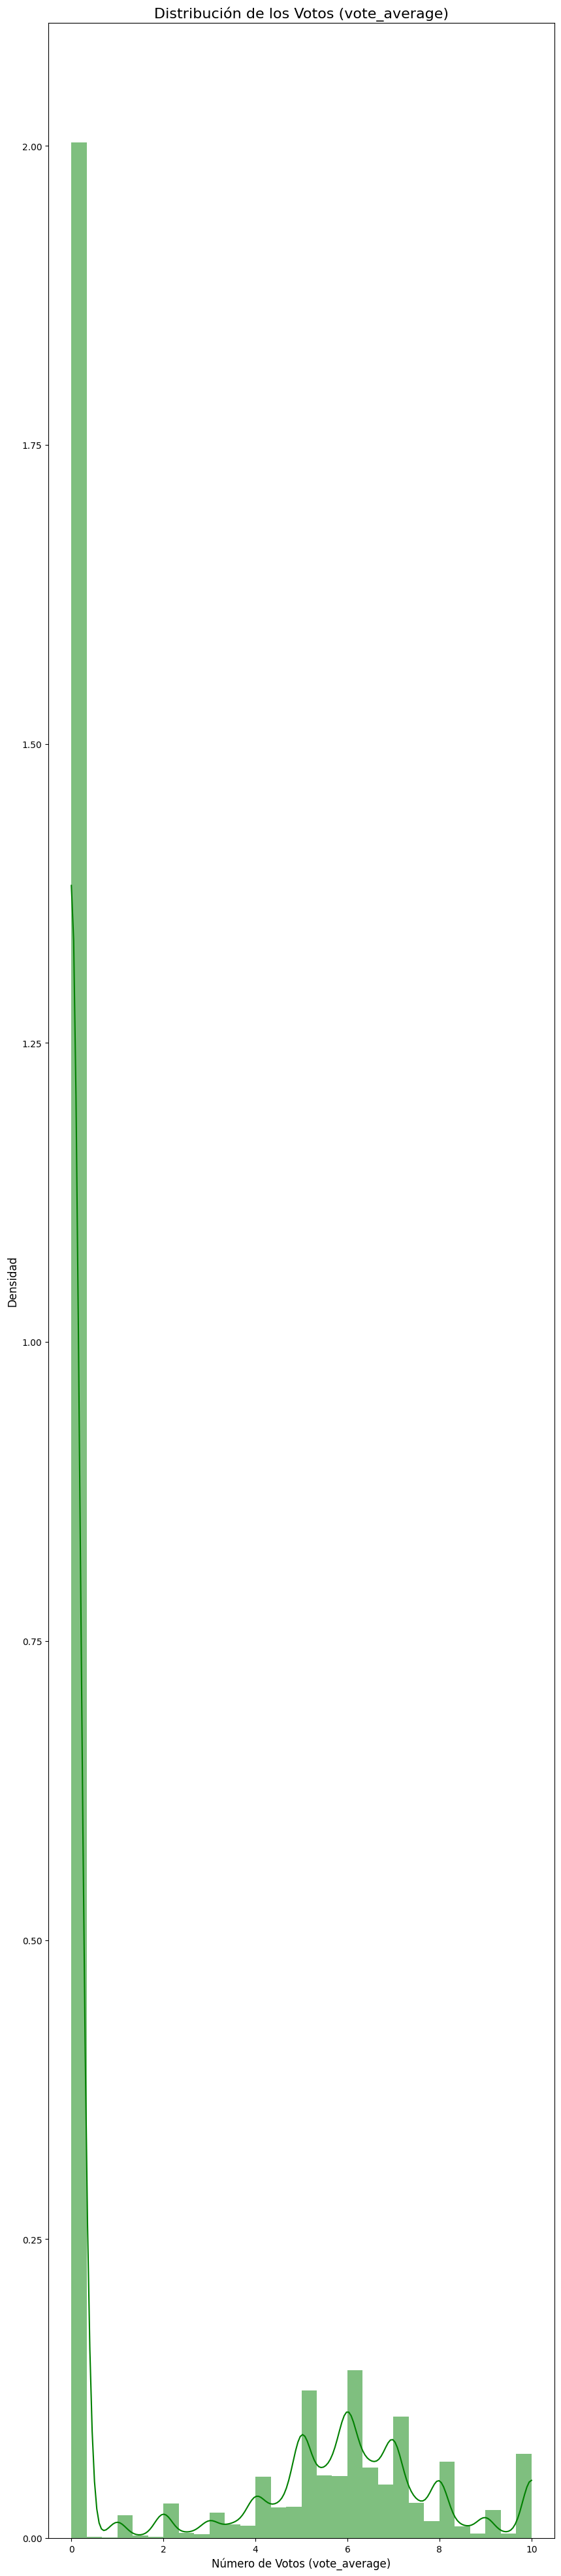

In [200]:
plt.figure(figsize=(10, 50))
sns.histplot(df['vote_average'], kde=True, bins=30, color='green', stat='density', linewidth=0)
plt.title("Distribución de los Votos (vote_average)", fontsize=16)
plt.xlabel("Número de Votos (vote_average)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.show()